In [234]:
%pip install - r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [1]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('ealaxi/paysim1', path='.', unzip=True)

In [236]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
data.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [237]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [238]:
# Check the num of customers who have started transactions
len(data['nameOrig'].unique())


6353307

### **Check the number of transactions of each payment type**

In [239]:
# Check how many transactions each payment type has
payment_type = pd.DataFrame(data['type'].value_counts()).reset_index().rename(
    columns={'index': 'payment type', 'type': 'num of transactions'})
payment_type


,payment type,num of transactions
0,CASH_OUT,2237500
1,PAYMENT,2151495
2,CASH_IN,1399284
3,TRANSFER,532909
4,DEBIT,41432


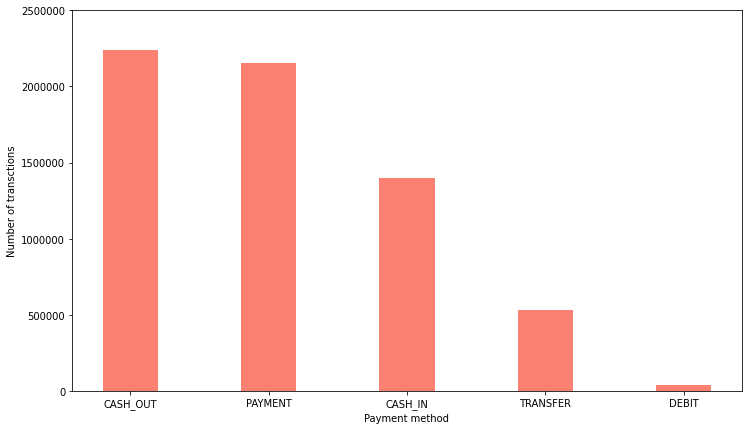

In [240]:
# Plot payment_type dataframe
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain')
plt.ylim(0, 2500000)
plt.bar(payment_type['payment type'],
        payment_type['num of transactions'], color='salmon', width=0.4)
plt.xlabel('Payment method')
plt.ylabel('Number of transctions')
plt.show()


### **Check the number of fraudulent transactions of each payment type**

In [241]:
num_fraud = data[['type', 'isFraud']].groupby('type').sum().reset_index().rename(
    columns={'type': 'payment type', 'isFraud': 'num of fraud'}).sort_values(by=['num of fraud'], ascending=False)
num_fraud


,payment type,num of fraud
1,CASH_OUT,4116
4,TRANSFER,4097
0,CASH_IN,0
2,DEBIT,0
3,PAYMENT,0


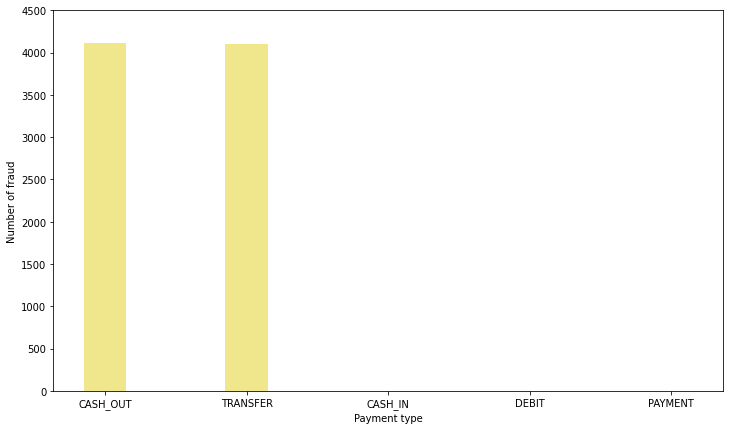

In [242]:
# Plot num_fraud dataframe
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain')
plt.ylim(0, 4500)
plt.bar(num_fraud['payment type'],
        num_fraud['num of fraud'], color='khaki', width=0.3)
plt.xlabel('Payment type')
plt.ylabel('Number of fraud')
plt.show()


### **Check the number of flagged fraudulent transactions of each payment type**

In [243]:
num_flaggedfraud = data[['type', 'isFlaggedFraud']].groupby('type').sum().reset_index().rename(
    columns={'type': 'payment type', 'isFlaggedFraud': 'num of flagged fraud'}).sort_values(by=['num of flagged fraud'], ascending=False)
num_flaggedfraud


,payment type,num of flagged fraud
4,TRANSFER,16
0,CASH_IN,0
1,CASH_OUT,0
2,DEBIT,0
3,PAYMENT,0


### **Dig more insights about the transaction amount and fraud transactions**

In [244]:
# Find the transactions that are fraud
transaction_amount_of_fraud = data[['amount', 'isFraud']].rename(
    columns={'amount': 'transaction amount', 'isFraud': 'transaction is fraud'})
transaction_amount_of_fraud = transaction_amount_of_fraud.loc[transaction_amount_of_fraud['transaction is fraud'] == 1].sort_values(by=[
                                                                                                                                    'transaction amount'], ascending=False)
transaction_amount_of_fraud


,transaction amount,transaction is fraud
3760283,10000000.0,1
5987587,10000000.0,1
1707592,10000000.0,1
1707591,10000000.0,1
1707590,10000000.0,1
...,...,...
5996410,0.0,1
5996408,0.0,1
6362461,0.0,1
6362463,0.0,1


In [245]:
# Find the number of transactions by amount of each fraud transaction
transaction_amount_of_fraud = pd.DataFrame(transaction_amount_of_fraud.reset_index(
).drop(['index', 'transaction is fraud'], axis=1).value_counts())
transaction_amount_of_fraud = transaction_amount_of_fraud.reset_index().rename(
    columns={0: 'num of transactions'})


In [246]:
transaction_amount_of_fraud


,transaction amount,num of transactions
0,10000000.00,287
1,0.00,16
2,1165187.89,4
3,429257.45,4
4,119.00,2
...,...,...
3972,3576297.10,1
3973,3441041.46,1
3974,3171085.59,1
3975,39713.28,1


In [247]:
# Check how many of them are grater than 2 transactions
transaction_amount_of_fraud = transaction_amount_of_fraud.loc[
    transaction_amount_of_fraud['num of transactions'] >= 3]
transaction_amount_of_fraud


,transaction amount,num of transactions
0,10000000.00,287
1,0.00,16
2,1165187.89,4
3,429257.45,4


In [248]:
transaction_amount_of_fraud.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction amount   4 non-null      float64
 1   num of transactions  4 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 96.0 bytes


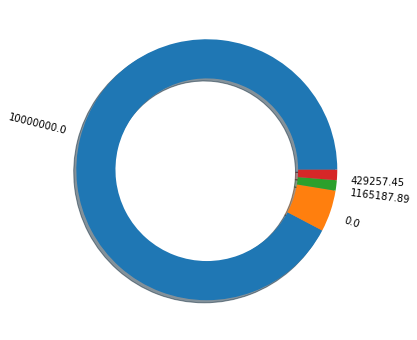

In [249]:
# Plot the result
plt.figure(figsize=(10, 6))
plt.pie(transaction_amount_of_fraud['num of transactions'],
        labels=transaction_amount_of_fraud['transaction amount'],
        shadow=True, rotatelabels=True, wedgeprops={"width": 0.3})
plt.show()
